**Sobhan Kooshki Jahromi**

student number : 810101496

signal & systems project

In [2]:
!pip install pydub

we use pydub for progrmaing on audio files it help us to do so many application on audio files.

In [3]:
import numpy as np
import pandas as pd
from scipy.io.wavfile import write
from scipy.io.wavfile import read
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

add numpy for our lists and perform numerical calculations (such as FFT, calculating frequencies).

add pandas for store data in DataFrame format and export to Excel format.

add scipy.io.wavfile for write WAV format audio files.

add scipy.io.wavfile for read WAV format audio files for data analysis.

add scipy.signal for find peaks in the frequency spectrum.

add matplotlib for plot nemodar :)

In [4]:
# sampling rate
fs = 44100
TIME_SILENCE = 0.025

# Num of harmonics
num_harmonics = 6

# base note we have to create it for harry potter
note_data = [
    ('B', 4, 0.3), ('E', 5, 0.6), ('G', 5, 0.2), ('F#', 5, 0.3), ('E', 5, 0.6),
    ('B', 5, 0.4), ('A', 5, 0.8), ('F#', 5, 0.8), ('E', 5, 0.6), ('G', 5, 0.2),
    ('F#', 5, 0.3), ('D#', 5, 0.7), ('F', 5, 0.4), ('B', 4, 1.6), ('B', 4, 0.3),
    ('E', 5, 0.6), ('G', 5, 0.2), ('F#', 5, 0.3), ('E', 5, 0.6), ('B', 5, 0.4),
    ('D', 6, 0.6), ('C#', 6, 0.3), ('C', 6, 0.6), ('G#', 5, 0.3), ('C', 5, 0.5),
    ('B', 5, 0.2), ('A#', 5, 0.3), ('A#', 4, 0.6), ('G', 5, 0.3), ('E', 5, 1.6),
    ('G', 5, 0.3), ('B', 5, 0.6), ('G', 5, 0.3), ('B', 5, 0.6), ('G', 5, 0.3),
    ('C', 6, 0.6), ('B', 5, 0.3), ('A#', 5, 0.6), ('F#', 5, 0.3), ('G', 5, 0.5),
    ('B', 5, 0.2), ('A#', 5, 0.3), ('A#', 4, 0.6), ('B', 4, 0.4), ('B', 5, 1.6),
    ('G', 5, 0.3), ('B', 5, 0.7), ('G', 5, 0.3), ('B', 5, 0.7), ('G', 5, 0.3),
    ('D', 6, 0.7), ('C#', 6, 0.3), ('C', 6, 0.8), ('G#', 5, 0.3), ('C', 6, 0.6),
    ('B', 5, 0.2), ('A#', 5, 0.3), ('A#', 4, 0.6), ('G', 5, 0.4), ('E', 5, 1),
    ('E', 5, 1.6)
]

# base note with some diffrences for sum 6 sin
note_data_similar = [
    ('B', 5, 0.3), ('E', 5, 0.6), ('G', 5, 0.2), ('F#', 5, 0.3), ('E', 5, 0.6),
    ('B', 5, 0.4), ('A', 5, 0.8), ('F#', 5, 0.8), ('E', 5, 0.6), ('G', 5, 0.2),
    ('F#', 5, 0.3), ('D#', 5, 0.7), ('F', 5, 0.4), ('B', 5, 1.6), ('B', 5, 0.3),
    ('E', 5, 0.6), ('G', 5, 0.2), ('F#', 5, 0.3), ('E', 5, 0.6), ('B', 5, 0.4),
    ('D', 5, 0.6), ('C#', 5, 0.3), ('C', 5, 0.6), ('G#', 5, 0.3), ('C', 5, 0.5),
    ('B', 5, 0.2), ('A#', 5, 0.3), ('A#', 5, 0.6), ('G', 5, 0.3), ('E', 5, 1.6),
    ('G', 5, 0.3), ('B', 5, 0.6), ('G', 5, 0.3), ('B', 5, 0.6), ('G', 5, 0.3),
    ('C', 5, 0.6), ('B', 5, 0.3), ('A#', 5, 0.6), ('F#', 5, 0.3), ('G', 5, 0.5),
    ('B', 5, 0.2), ('A#', 5, 0.3), ('A#', 5, 0.6), ('B', 5, 0.4), ('B', 5, 1.6),
    ('G', 5, 0.3), ('B', 5, 0.7), ('G', 5, 0.3), ('B', 5, 0.7), ('G', 5, 0.3),
    ('D', 5, 0.7), ('C#', 5, 0.3), ('C', 5, 0.8), ('G#', 5, 0.3), ('C', 5, 0.6),
    ('B', 5, 0.2), ('A#', 5, 0.3), ('A#', 5, 0.6), ('G', 5, 0.4), ('E', 5, 1),
    ('E', 5, 1.6)
]

base_freq = {
        'C': 16.352, 'C#': 17.324, 'D': 18.354, 'D#': 19.445, 'E': 20.601,
        'F': 21.827, 'F#': 23.125, 'G': 24.500, 'G#': 25.957, 'A': 27.500,
        'A#': 29.135, 'B': 30.868}

# Dict of note names and file paths
note_files = {
    "C5": "c5.wav",
    "C#5": "c51.wav",
    "D5": "d5.wav",
    "D#5": "d51.wav",
    "E5": "e5.wav",
    "F5": "f5.wav",
    "F#5": "f51.wav",
    "G5": "g5.wav",
    "G#5": "g51.wav",
    "A5": "a5.wav",
    "A#5": "a51.wav",
    "B5": "b5.wav",
}

# List of notes that we want to plot
notes_to_plot = {
    "D5": "d5.wav",
    "F5": "f5.wav",
    "A5": "a5.wav",
}

This is our global variebles

# STEP 1

in this section we create harry potter song with dictionary that said to us in question form.

In [11]:
# create a sine wave for this frequency and duration
def create_tone(frequency, duration , Fs):
    t = np.arange(0, duration, 1 / Fs)
    tone = np.sin(2 * np.pi * frequency * t)
    return tone

in function we create a list that have as size as fs for example in this case when fs equle to 44100 we create a list which size is 44100 and fill with 0 , 1/44100 , 2/44100 , 3/44100 , ...

after that we create tone with sin and formula in qestion and return it.

In [12]:
# add all notes into a single audio song
song = np.array([], dtype=np.float32)

for note_info in note_data:
    note, octave, duration = note_info[0] , note_info[1] , note_info[2]
    frequency = base_freq[note] * (2 ** octave)
    tone = create_tone(frequency, duration , fs)
    song = np.concatenate((song, tone))
    tone = np.zeros(int(fs * TIME_SILENCE))
    song = np.concatenate((song, tone))

**Why we write base_frequencies[note] * (2 ** octave)**

Octave in music refers to the distance between two notes, one having twice the frequency of the other.

The frequency of the note A4 (A in the fourth octave) is equal to 440Hz

The frequency of the note A5 (A in the fifth octave) is equal to 880Hz

The frequency of the note A3 (A in third th octave) is equal to 220Hz

so for evalute exaclty frequency of one note we use base (0_octave) frequency and multiply with 2 ** octave.

---

in this for we select cell in numpy array that create its note and added to our song so first we get frequncy from the base note in octave 0 now we have exactly frequence's note.

after that we create tone in generate tone with frequence that we find in last function with sin formula.

in the next step we can add this tone to our song and bettween the note we add zero witch means silent frequence

In [13]:
# Normalize song to wav form
song = np.int16(song / np.max(np.abs(song)) * 32767)

# Write to wav file
write('noteHarryPotter.wav', fs, song)
print("CREATE -> noteHarryPotter.wav")

CREATE -> noteHarryPotter.wav


in this cell we have to normalize the song to can write it in wav file so we have to normalize it with this part of code.

for write the wav file we use write function

# STEP 2

in this part we found harmonics of notes and create smooth note after that we create harry potter song with our smooth notes.

In [14]:
def read_note(file_path):
    fs, data = read(file_path)
    if data.shape[1] == 2: # Assuming stereo if 2 columns
        data = data[:, 0]
    return fs, data

def evalute_FFT(note , fs) :
    fft_note = np.fft.fft(note)
    magnitude = np.abs(fft_note)
    frequencie = np.fft.fftfreq(len(fft_note), d=1/fs)
    return frequencie , magnitude

def evalute_peak(frequency , magnitude) :
    peak_indexes, temp = find_peaks(magnitude, height=1e4)
    peak_magnitudes = magnitude[peak_indexes]
    peak_frequencies = frequency[peak_indexes]
    return peak_frequencies , peak_magnitudes

def buildup_hormonics(num_harmonics , fundamental_freq , peak_frequencies , peak_magnitudes) :
    result = []
    for i in range(1, num_harmonics + 1):
        harmonic_freq = fundamental_freq * i
        closest_peak_index = min(range(len(peak_frequencies)), key=lambda idx: abs(peak_frequencies[idx] - harmonic_freq))
        result.append((peak_frequencies[closest_peak_index], peak_magnitudes[closest_peak_index]))
    return result

def save_pos(frequency , magnitudes) :
    positive_indices = np.where(frequency > 0)
    positive_frequencies = frequency[positive_indices]
    positive_magnitudes = magnitudes[positive_indices]
    return positive_frequencies , positive_magnitudes

# Function to analyze a single .wav file and extract harmonics
def check_note(file_path):
    fs, note = read_note(file_path)

    # build FFT
    frequencies, magnitudes = evalute_FFT(note, fs)

    # Filter pos frequencies
    positive_frequencies, positive_magnitudes = save_pos(frequencies, magnitudes)

    # Find peaks
    peak_frequencies, peak_magnitudes = evalute_peak(positive_frequencies, positive_magnitudes)

    # can find fundamental index and freq
    fundamental_index = np.argmax(peak_magnitudes)
    fundamental_freq = peak_frequencies[fundamental_index]

    # return the six harmonics
    return buildup_hormonics(num_harmonics, fundamental_freq, peak_frequencies, peak_magnitudes)

**in read_note function we have -->**

fs, data = read(file_path): This line uses the read function (likely imported from scipy.io.wavfile) to read the audio data from the file specified by file_path. The readfunction returns two values:

fs: The sampling rate of the audio file (how many audio samples are taken per second). This value is assigned to the variable fs.
data: The actual audio data, which is typically a NumPy array. This is assigned to the variable data.

---

**in evalute_FFT function we have -->**

fft_data = np.fft.fft(data): This line performs the core of the operation, the FFT itself.
np.fft.fft is a function from the NumPy library that computes the FFT.
It takes the data and transforms it from the time domain (a sequence of samples over time) to the frequency domain (representing the strength of different frequencies present in the data).
The result is stored in the variable fft_data.

frequencies = np.fft.fftfreq(len(fft_data), d=1/fs): This line calculates the frequencies corresponding to each element in the fft_data.
np.fft.fftfreq is another NumPy function that generates the frequency values.
len(fft_data) provides the size of the FFT data.
d=1/fs specifies the time step between samples, derived from the sampling rate (fs).
The calculated frequencies are stored in the frequencies variable.

magnitudes = np.abs(fft_data): This line computes the magnitude (or absolute value) of each frequency component.
np.abs calculates the absolute value.
The resulting magnitudes represent the strength or amplitude of each frequency in the audio data.
These magnitudes are stored in the magnitudes variable.

---

In signal processing, after performing an FFT, you often get a representation of frequencies that includes both positive and negative values. For many audio applications, the negative frequencies are a mirror image of the positive frequencies and don't provide additional information. Therefore, they are often filtered out.

so we save the posetive part of them

---
**in evalute_peak function we have -->**

peak_indices, temp = find_peaks(magnitudes, height=1e5): This line uses the find_peaks function from the scipy.signal module to identify the peaks in the magnitudes array.
height=1e5: This argument sets a threshold. Only peaks with a magnitude greater than 1e4 (which is 10,000) will be considered.
peak_indices: This variable stores the indices (locations) within the magnitudes array where the peaks were found.
temp: This variable captures additional properties of the peaks, which are not used in this function.

peak_frequencies = frequency[peak_indices]: This line uses the peak_indices to extract the corresponding frequencies from the frequency array. The result is stored in peak_frequencies.
peak_magnitudes = magnitudes[peak_indices]: Similarly, this line extracts the magnitudes of the peaks using the peak_indices and stores them in peak_magnitudes.

---

**in buildup_hormonics function we have -->**

harmonic_freq = i * fundamental_freq: For each harmonic number (i), the theoretical frequency of that harmonic is calculated by multiplying the fundamental_freq (the fundamental frequency of the note) by i.

closest_peak_idx = (np.abs(peak_frequencies - harmonic_freq)).argmin(): This line finds the index of the peak frequency in the peak_frequencies array that is closest to the calculated harmonic_freq.
np.abs(peak_frequencies - harmonic_freq) calculates the absolute difference between each peak frequency and the calculated harmonic frequency.
argmin() finds the index of the minimum value in the resulting array, which represents the closest peak.

result.append((peak_frequencies[closest_peak_idx], peak_magnitudes[closest_peak_idx])): The frequency and magnitude of the closest peak (representing the harmonic) are appended to the result list as a tuple.

In [15]:
# Analyze all notes and store the harmonic data
harmonic_notes = []
for note, file_path in note_files.items():
    harmonics = check_note(file_path)
    for i in range(len(harmonics)):
        frequencyR = harmonics[i][0]
        magnitudeR = harmonics[i][1]
        harmonic_notes.append({"name note": note,"number harmon": i + 1,
                               "frequency": frequencyR,"magnitude": magnitudeR,})

in this cell we loop in our note files and recive harmonics
after that we create a list and added to them for create exel file

In [16]:
# Save harmonic data to an Excel file
dataframe = pd.DataFrame(harmonic_notes)
dataframe.to_excel("harmonics.xlsx", index=False)
print("CREATE -> harmonics.xlsx")

CREATE -> harmonics.xlsx


this cell can convert this data frame to excel

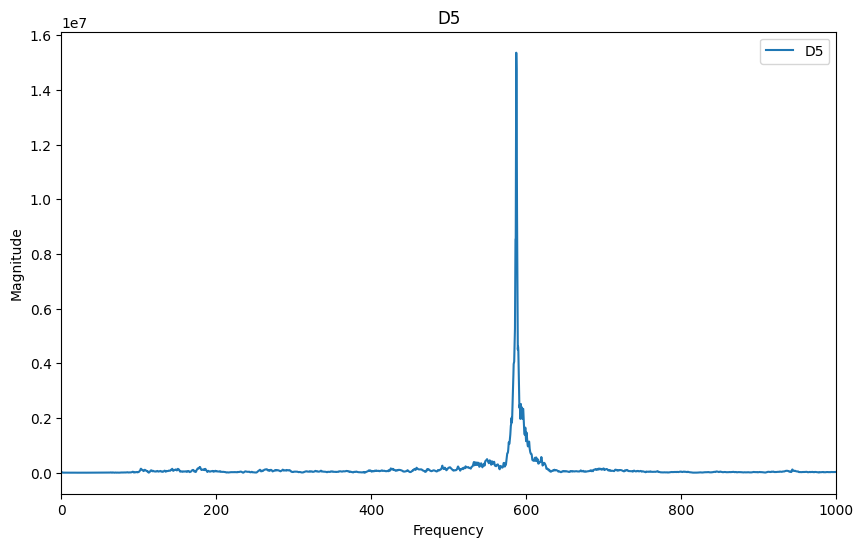

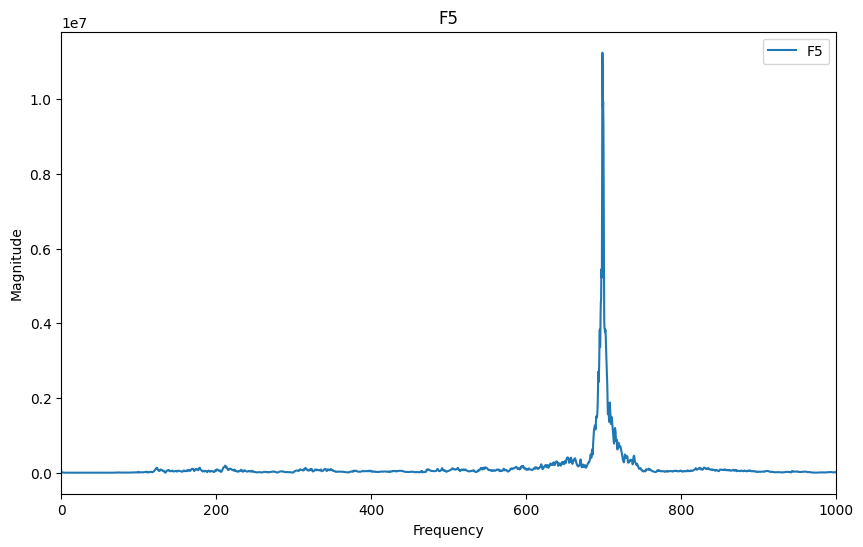

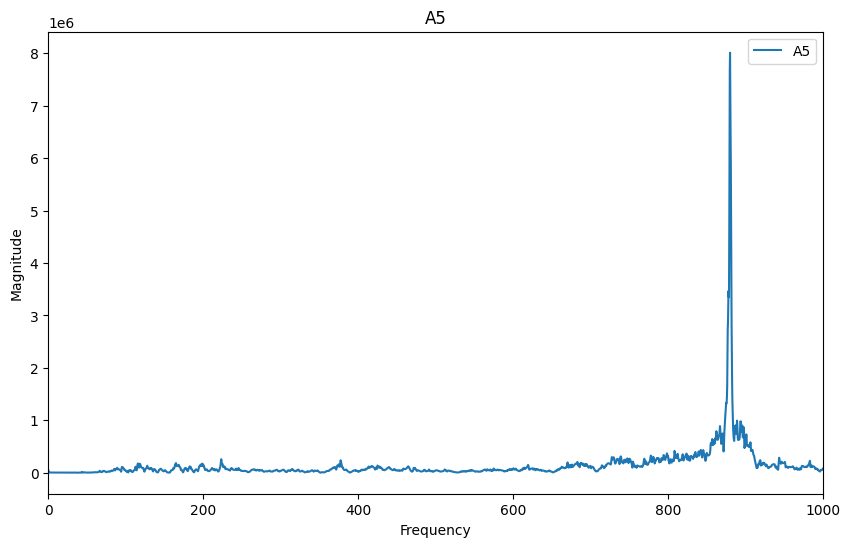

In [17]:
# compute & plot the Fourier Transform
def plot_function(file_path, note_name):
    # compute part
    fs, data = read_note(file_path)
    frequencies, magnitudes = evalute_FFT(data, fs)
    positive_frequencies, positive_magnitudes = save_pos(frequencies, magnitudes)

    # Plot part
    plt.figure(figsize=(10, 6))
    plt.plot(positive_frequencies, positive_magnitudes, label=note_name)
    plt.title(note_name)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.xlim(0, 1000)
    plt.legend()
    plt.show()

# Plot the Fourier Transform for each note
for plot_note in notes_to_plot.items():
    name, file_path = plot_note
    plot_function(file_path, name)


 this code snippet reads audio files for specified notes, calculates their frequency content using the Fourier Transform, and then generates plots to visualize the frequencies and their magnitudes. This allows you to see the dominant frequencies that make up each musical note.

In [18]:
def biuldup_all_harmonics(note_data):
    all_harmonics = []
    for i in range(1, num_harmonics + 1):
        harmonic_data = note_data[note_data["number harmon"] == i]
        avg_frequency = harmonic_data["frequency"].mean()
        avg_amplitude = harmonic_data["magnitude"].mean()
        print('harmonic_data:' , harmonic_data)
        all_harmonics.append({"frequency": avg_frequency, "magnitude": avg_amplitude})
    return all_harmonics

this part of code is for read from excel and add information to one dataframe so after we create this dataframe we have one data structure which include all harmonics of one note.

In [19]:
# Load harmonic data from Excel
harmonics_df = pd.read_excel("harmonics.xlsx")

# Calculate mean harmonic data for each note
note_all_hormonics = {}
unique_notes = harmonics_df["name note"].unique()
for note in unique_notes:
    note_data_ = harmonics_df[harmonics_df["name note"] == note]
    print("note : " , note)
    print("note_data_:" , note_data_)
    note_all_hormonics[note] = biuldup_all_harmonics(note_data_)
print('\nnote_means: -->' , note_all_hormonics)

note :  C5
note_data_:   name note  number harmon    frequency     magnitude
0        C5              1   523.254232  1.574994e+07
1        C5              2  1047.175030  3.270250e+06
2        C5              3  1569.429414  3.757723e+05
3        C5              4  2092.683646  1.705957e+05
4        C5              5  2615.937878  8.335122e+04
5        C5              6  3138.858827  1.232231e+04
harmonic_data:   name note  number harmon   frequency     magnitude
0        C5              1  523.254232  1.574994e+07
harmonic_data:   name note  number harmon   frequency     magnitude
1        C5              2  1047.17503  3.270250e+06
harmonic_data:   name note  number harmon    frequency      magnitude
2        C5              3  1569.429414  375772.256565
harmonic_data:   name note  number harmon    frequency      magnitude
3        C5              4  2092.683646  170595.721979
harmonic_data:   name note  number harmon    frequency     magnitude
4        C5              5  2615.93787

In [20]:
# Function to create signal which added 6 sin
def create_real_note(note, duration):
    t = np.arange(0, duration, 1/fs)
    signal = np.zeros(t.shape, dtype=t.dtype)
    for harmonic in note_all_hormonics[note]:
        signal = signal + (harmonic["magnitude"]) * np.sin(2 * np.pi * harmonic["frequency"] * t)

    # this part we add damping signal
    damping_factor = 0.15
    damp_signal = np.exp(-t / damping_factor)
    return signal * damp_signal

t = np.arange(0, duration, 1/fs):

This line creates a time array t using np.arange.
It represents the time points for the audio signal, starting from 0 to duration with a step of 1/fs (which is the sampling interval). fs is the sampling rate.
Think of it as creating a sequence of points in time that the audio will exist at.

---

signal = signal + (harmonic["magnitude"]) * np.sin(2 * np.pi * harmonic["frequency"] * t):

Inside the loop, this line adds a sine wave to the signal for each harmonic.
harmonic["magnitude"] and harmonic["frequency"] are the magnitude and frequency of the current harmonic, respectively.
The sine wave formula is used to generate the harmonic: np.sin(2 * np.pi * harmonic["frequency"] * t).
By adding multiple sine waves (harmonics) together, the function builds up the complex sound of the musical note.

---

tau = 0.15 # Adjust damping factor if needed:

tau controls the decay rate of the damping effect.

envelope = np.exp(-t / tau):

This line creates a damping envelope using an exponential decay function.

In [21]:
# create the full song
song_test = np.array([], dtype=np.float32)
for note_info in note_data_similar:
    note, octave, duration = note_info[0] , note_info[1] , note_info[2]
    note_name = note + str(octave)
    note_signal = create_real_note(note_name, duration)
    song_test = np.concatenate((song_test, note_signal))
    tone = np.zeros(int(fs * TIME_SILENCE))
    song_test = np.concatenate((song_test, tone))

in this cell we at first we create numpy array for our song_test after that we read from note_data_similar (it is global var) after that we create note name that pass to generate_note function.

it returens one damping note so we add to our song , bettween two damping note we add silent note.

In [22]:
# Normalize the final waveform
song_test = np.int16(song_test / np.max(np.abs(song_test)) * 32767)

# Save the song to wav file
write("optimized_note.wav", fs, song_test)
print("CREATE -> optimized_note.wav")

CREATE -> optimized_note.wav


in this cell we have to normalize the song to can write it in wav file so we have to normalize it with this part of code.

for write the wav file we use write function

In [23]:
from google.colab import files
f = files.upload()
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])
files.download(file0[:-5]+"html")

IndexError: list index out of range